In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)

In [9]:
plt.rcParams["figure.figsize"] = (7, 5)
plt.style.use("seaborn-v0_8-whitegrid")

In [7]:
# Load the Iris dataset

iris = load_iris()
X = iris.data
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


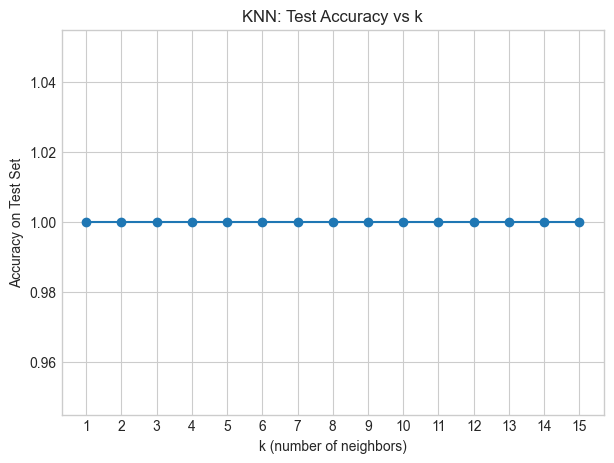

k= 1 -> Accuracy=1.000
k= 2 -> Accuracy=1.000
k= 3 -> Accuracy=1.000
k= 4 -> Accuracy=1.000
k= 5 -> Accuracy=1.000
k= 6 -> Accuracy=1.000
k= 7 -> Accuracy=1.000
k= 8 -> Accuracy=1.000
k= 9 -> Accuracy=1.000
k=10 -> Accuracy=1.000
k=11 -> Accuracy=1.000
k=12 -> Accuracy=1.000
k=13 -> Accuracy=1.000
k=14 -> Accuracy=1.000
k=15 -> Accuracy=1.000


In [8]:
# Test different k values
k_values = range(1, 16)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

plt.figure()
plt.plot(k_values, accuracies, marker="o")
plt.title("KNN: Test Accuracy vs k")
plt.xlabel("k (number of neighbors)")
plt.ylabel("Accuracy on Test Set")
plt.xticks(k_values)
plt.grid(True)
plt.show()

for k, acc in zip(k_values, accuracies):
    print(f"k={k:2d} -> Accuracy={acc:.3f}")


In [15]:
import seaborn as sns
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [16]:
X = df[['total_bill']]
y = df['sex']

print(X.head())
print(y.value_counts())

   total_bill
0       16.99
1       10.34
2       21.01
3       23.68
4       24.59
sex
Male      157
Female     87
Name: count, dtype: int64


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

print(set(y))


{np.int64(0), np.int64(1)}


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_s, y_train)

y_pred_knn = knn.predict(X_test_s)
print("KNN accuracy:", accuracy_score(y_test, y_pred_knn))


KNN accuracy: 0.5714285714285714


In [3]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [4]:
iris = load_iris()

X = iris.data          # semua feature (raw)
y = iris.target        # class label

class_names = iris.target_names


In [5]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
# Train and evaluate Gaussian Naive Bayes
nb_clf = GaussianNB()
nb_clf.fit(X_train_raw, y_train)

y_pred_nb = nb_clf.predict(X_test_raw)

acc_nb = accuracy_score(y_test, y_pred_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb)

print("=== Gaussian Naive Bayes on Iris ===")
print(f"Accuracy: {acc_nb:.3f}")
print("\nConfusion Matrix (Naive Bayes):\n", cm_nb)
print("\nClassification Report (Naive Bayes):\n")
print(classification_report(y_test, y_pred_nb, target_names=class_names))


=== Gaussian Naive Bayes on Iris ===
Accuracy: 1.000

Confusion Matrix (Naive Bayes):
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report (Naive Bayes):

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<Axes: >

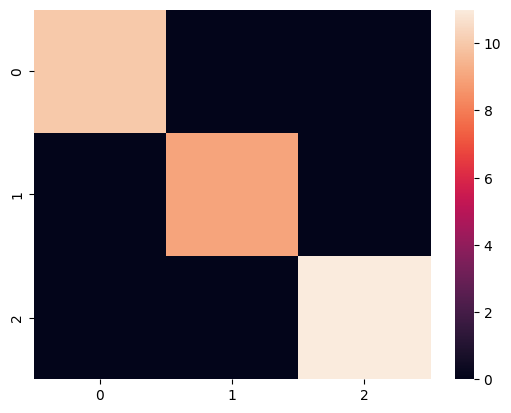

In [7]:
import seaborn as sns
sns.heatmap(cm_nb)

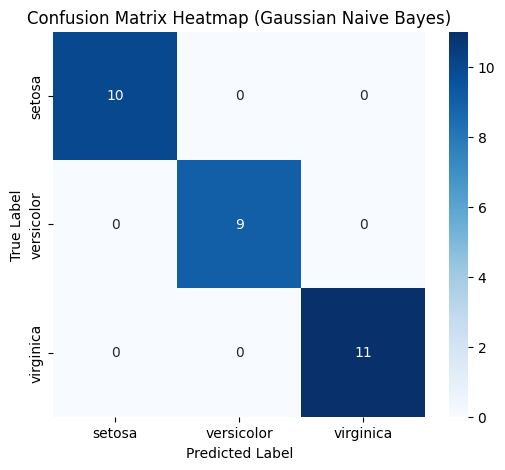

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for Confusion Matrix (Naive Bayes)
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_nb,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap (Gaussian Naive Bayes)")
plt.show()
